<div class="alert">
<div style="direction:ltr;text-align:center;font-family: B Tahoma; font-size:24pt"> Practical Deep Learning Course for Computer Vision
</div>
</div>

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:Tahoma; font-size:16pt"> Dropout, Data Augmention, Callbacks,...
</div>
</div>

<img src="./images/overfitting.png" alt="Overfitting">
<a href="https://miro.medium.com/max/2400/1*UCd6KrmBxpzUpWt3bnoKEA.png">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Import the required libraries.<br>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from keras.utils import to_categorical

Using TensorFlow backend.


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Load the dataset:
</div>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Displaying the dataset:
</div>

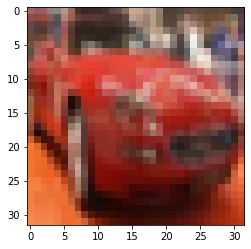

In [3]:
plt.imshow(x_train[5])

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Create tf.data:
</div>

In [4]:
def preprocess(input_image, label):
    input_image = tf.cast(input_image, tf.float32)
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label,  depth=10)
    label = tf.squeeze(label)
    input_image = input_image / 255
    input_image = tf.reshape(input_image, [32*32*3])
    
    return input_image, label

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(128).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32)

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Defining the classifier:
</div>

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1024, activation='relu', input_shape=(32*32*3,)), 
                             tf.keras.layers.Dense(1024, activation='relu'), 
                             tf.keras.layers.Dense(512, activation='relu'), 
                             tf.keras.layers.Dense(256, activation='relu'), 
                             tf.keras.layers.Dense(10, activation='softmax')])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 4,855,050
Trainable params: 4,855,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Fitting the classifier:
</div>

In [9]:
history = model.fit(train_dataset, epochs=20)

Train for 1563 steps
Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8921 - accuracy: 0.3085
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7202 - accuracy: 0.3791
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6452 - accuracy: 0.4084
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5931 - accuracy: 0.4275
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5409 - accuracy: 0.4445
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5033 - accuracy: 0.4589
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4622 - accuracy: 0.4733
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4378 - accuracy: 0.4819
Epoch 9/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4080 - accuracy: 0.4919
Epoch 10/20
1563/1563 [=============================

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Evaluating the classifier:
</div>

In [10]:
loss, accuracy = model.evaluate(train_dataset, verbose=0)
print("Accuracy is %.2f %%" %(accuracy * 100))

Accuracy is 54.59 %


In [11]:
loss, accuracy = model.evaluate(test_dataset, verbose=0)
print("Accuracy is %.2f %%" %(accuracy * 100))

Accuracy is 45.92 %


<img src="./images/dropout.png" alt="Dropout">
<a href="https://www.researchgate.net/profile/Amine_Ben_khalifa/publication/309206911/figure/fig3/AS:418379505651712@1476760855735/Dropout-neural-network-model-a-is-a-standard-neural-network-b-is-the-same-network.png">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Adding Dropout, Data Augmention, Callback,...:
</div>

In [12]:
def preprocess_train(input_image, label):
    input_image = tf.cast(input_image, tf.float32)
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label,  depth=10)
    label = tf.squeeze(label)
    input_image = tf.image.random_flip_left_right(input_image)
    input_image = tf.image.resize_with_crop_or_pad(input_image, 32, 32)
    input_image = input_image / 255
    input_image = tf.reshape(input_image, [32*32*3])
    
    return input_image, label

def preprocess_test(input_image, label):
    input_image = tf.cast(input_image, tf.float32)
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label,  depth=10)
    label = tf.squeeze(label)
    input_image = input_image / 255
    input_image = tf.reshape(input_image, [32*32*3])
    
    return input_image, label

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(preprocess_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(128).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32)

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Dense(512, activation='relu', input_shape=(32*32*3,)), 
                             tf.keras.layers.Dense(512, activation='relu'), 
                             tf.keras.layers.Dense(256, activation='relu'), 
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(128, activation='relu'), 
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation='softmax')])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 
                                                                          tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

In [16]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_accuracy"),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', 
                                       save_best_only=True, 
                                       monitor="val_accuracy")
]

In [17]:
model.fit(train_dataset, epochs=20, callbacks=my_callbacks, validation_data=test_dataset)

Train for 1563 steps, validate for 313 steps
Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0619 - accuracy: 0.2224 - top_k_categorical_accuracy: 0.7492 - val_loss: 1.8528 - val_accuracy: 0.3186 - val_top_k_categorical_accuracy: 0.8284
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8951 - accuracy: 0.3077 - top_k_categorical_accuracy: 0.8203 - val_loss: 1.8239 - val_accuracy: 0.3393 - val_top_k_categorical_accuracy: 0.8396
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8406 - accuracy: 0.3352 - top_k_categorical_accuracy: 0.8361 - val_loss: 1.7807 - val_accuracy: 0.3546 - val_top_k_categorical_accuracy: 0.8482
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8115 - accuracy: 0.3485 - top_k_categorical_accuracy: 0.8401 - val_loss: 1.7929 - val_accuracy: 0.3368 - val_top_k_categorical_accuracy: 0.8499
Epoch 5/20
1563/1563 [==============================] - 10s 7ms

In [18]:
loss, accuracy, top5 = model.evaluate(train_dataset, verbose=0)
print("Accuracy is %.2f %%" %(accuracy * 100))
print("Top 5 accuracy is %.2f %%" %(top5 * 100))

Accuracy is 41.12 %
Top 5 accuracy is 88.62 %


In [19]:
loss, accuracy, top5 = model.evaluate(test_dataset, verbose=0)
print("Accuracy is %.2f %%" %(accuracy * 100))
print("Top 5 accuracy is %.2f %%" %(top5 * 100))

Accuracy is 40.30 %
Top 5 accuracy is 87.85 %


<div class="alert">
<div style="direction:ltr;text-align:left;font-family:B Tahoma"> Practical Deep Learning Course for Computer Vision
<br>Vahid Reza Khazaie<br>
</div>
<a href="https://www.linkedin.com/in/vahidrezakhazaie/">LinkedIn</a> - <a href="https://github.com/vrkh1996">GitHub</a>

</div>